In [1]:
from leaf_area import *
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = np.load('LeafCounting/data/dataset_folder_5.npz', allow_pickle=True)

In [3]:
x = data['arr_0']
y = data['arr_1']

In [4]:
x.shape

(74, 240, 240, 3)

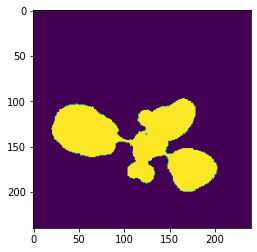

In [594]:
output, mask = extract_leaf(x[30])
plt.imshow(mask)

In [16]:
print(calculate_leaf_area("E:/Dataset/A5/rgb_00_009_05.png"))

0.13899305555555555


In [17]:
print(calculate_green_pixel(mask)/(240*240)*100)

13.854166666666668


In [19]:
dataset = np.load('LeafCounting/data/dataset.npz', allow_pickle=True)
(x_train, x_val, x_test, y_train, y_val, y_test) = dataset['data']

In [173]:
# boundaries for green color
boundaries = [
    ([33, 50, 50], [90, 255, 255])
#     ([103, 86, 65], [145, 133, 128])
#     ([20, 0, 0], [100, 180, 176])
]
(lower, upper) = boundaries[0]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

In [228]:
def remove_noises_mask_test(mask):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#     mask = cv2.erode(mask, element, iterations=1)
    mask = cv2.dilate(mask, element, iterations=1)
#     mask = cv2.erode(mask, element)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, element)
    return mask

def extract_leaf_test(np_image):
    hsvIm = cv2.cvtColor(np_image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsvIm, lower, upper)
#     mask = remove_noises_mask_test(mask)
    output = cv2.bitwise_and(np_image, np_image, mask=mask)

    return output, mask

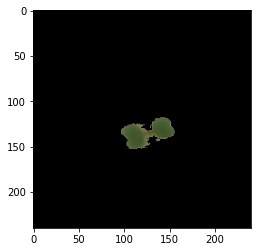

In [229]:
index = 3
test = x[index].copy()
leaf_image, leaf_mask = extract_leaf_test(x[index])
plt.imshow(leaf_image)

In [591]:
index = 3
test = x[index].copy()
leaf_image, leaf_mask = extract_leaf_test(x[index])
# centroid = find_centroid(x[index])
image = cv2.cvtColor(leaf_image, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(leaf_mask, 150, 255)
ret, thresh = cv2.threshold(leaf_mask, 100, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [592]:
def find_good_contours(contours, threshold):
    new_contours = []
    for i in range(len(contours)):
        if len(contours[i]) >= threshold:
            new_contours.append(contours[i])
            
    return new_contours

contours = find_good_contours(contours, 10)
len(contours)

1

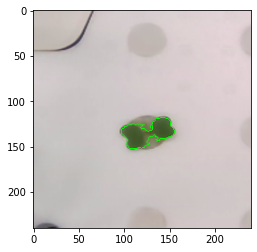

In [593]:
test = x[index].copy()
plt.imshow(cv2.drawContours(test, contours, -1, (0,255,0)))

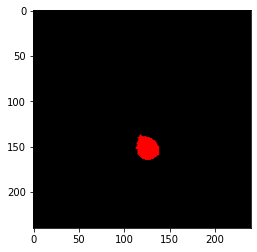

In [551]:
test = x[index].copy()
mask = np.zeros(test.shape,dtype="uint8")
plt.imshow(cv2.drawContours(mask, [contours[0]], -1, 255, -1))

In [550]:
len(contours)

2